In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import os
from tqdm import tqdm

class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(784, 64)  
        self.out = nn.Linear(64, 784)

    def forward(self, x):
        x = torch.relu(self.fc(x)) 
        x = self.out(x)  
        return x

model = SingleLayerNN()


criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)  


In [2]:
train_dataset = MNIST(os.getcwd(), train=True, download=True, transform=[transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
x_train = train_dataset.data / 255.0
x_train = torch.tensor(x_train, dtype=torch.float32)
x_train = x_train.view(-1, 784)
trainloader = DataLoader(x_train, batch_size=64, shuffle=True)

C:\Users\ianey\AppData\Local\Temp\ipykernel_21328\2340656213.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)


In [3]:
model = model.to('cuda')
lay = []
for n, i in model.named_children():
    print(type(i).__name__)
    if type(i).__name__ == "Linear":
        lay.append((n, i))

l1_lambda = 0.0005

num_epochs = 20  
for epoch in range(num_epochs):
    for b in tqdm(trainloader):
        b = b.to('cuda')
        optimizer.zero_grad() 
        outputs = model(b)  
        loss = criterion(outputs, b) 

        l1_penalty = sum(p.abs().sum() for p in model.parameters())
        loss += l1_lambda * l1_penalty 

        loss.backward() 
        optimizer.step() 
    
    
    # for i in range(len(lay)):
    #     if i > 0 and i <= len(lay)-1:
    #         neuronalNeuralBalance(lay[i-1][1], lay[i][1])

    print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')


Linear
Linear


100%|██████████| 938/938 [00:03<00:00, 287.47it/s]


Epoch 0/20, Loss: 0.1334373950958252


100%|██████████| 938/938 [00:03<00:00, 288.90it/s]


Epoch 1/20, Loss: 0.14730164408683777


100%|██████████| 938/938 [00:03<00:00, 286.03it/s]


Epoch 2/20, Loss: 0.12965843081474304


100%|██████████| 938/938 [00:03<00:00, 284.63it/s]


Epoch 3/20, Loss: 0.13709402084350586


100%|██████████| 938/938 [00:03<00:00, 284.25it/s]


Epoch 4/20, Loss: 0.13489040732383728


100%|██████████| 938/938 [00:03<00:00, 275.13it/s]


Epoch 5/20, Loss: 0.13118228316307068


100%|██████████| 938/938 [00:03<00:00, 235.23it/s]


Epoch 6/20, Loss: 0.13815808296203613


100%|██████████| 938/938 [00:03<00:00, 270.69it/s]


Epoch 7/20, Loss: 0.13217833638191223


100%|██████████| 938/938 [00:03<00:00, 291.79it/s]


Epoch 8/20, Loss: 0.13769470155239105


100%|██████████| 938/938 [00:03<00:00, 295.87it/s]


Epoch 9/20, Loss: 0.12620823085308075


100%|██████████| 938/938 [00:04<00:00, 208.15it/s]


Epoch 10/20, Loss: 0.13818475604057312


100%|██████████| 938/938 [00:04<00:00, 224.15it/s]


Epoch 11/20, Loss: 0.13330703973770142


100%|██████████| 938/938 [00:04<00:00, 224.33it/s]


Epoch 12/20, Loss: 0.1308077871799469


100%|██████████| 938/938 [00:03<00:00, 265.98it/s]


Epoch 13/20, Loss: 0.12846031785011292


100%|██████████| 938/938 [00:03<00:00, 298.98it/s]


Epoch 14/20, Loss: 0.12842556834220886


100%|██████████| 938/938 [00:03<00:00, 257.26it/s]


Epoch 15/20, Loss: 0.13335278630256653


100%|██████████| 938/938 [00:03<00:00, 288.03it/s]


Epoch 16/20, Loss: 0.13339315354824066


100%|██████████| 938/938 [00:03<00:00, 273.57it/s]


Epoch 17/20, Loss: 0.131694495677948


100%|██████████| 938/938 [00:03<00:00, 279.23it/s]


Epoch 18/20, Loss: 0.1345500349998474


100%|██████████| 938/938 [00:03<00:00, 287.53it/s]

Epoch 19/20, Loss: 0.13425737619400024


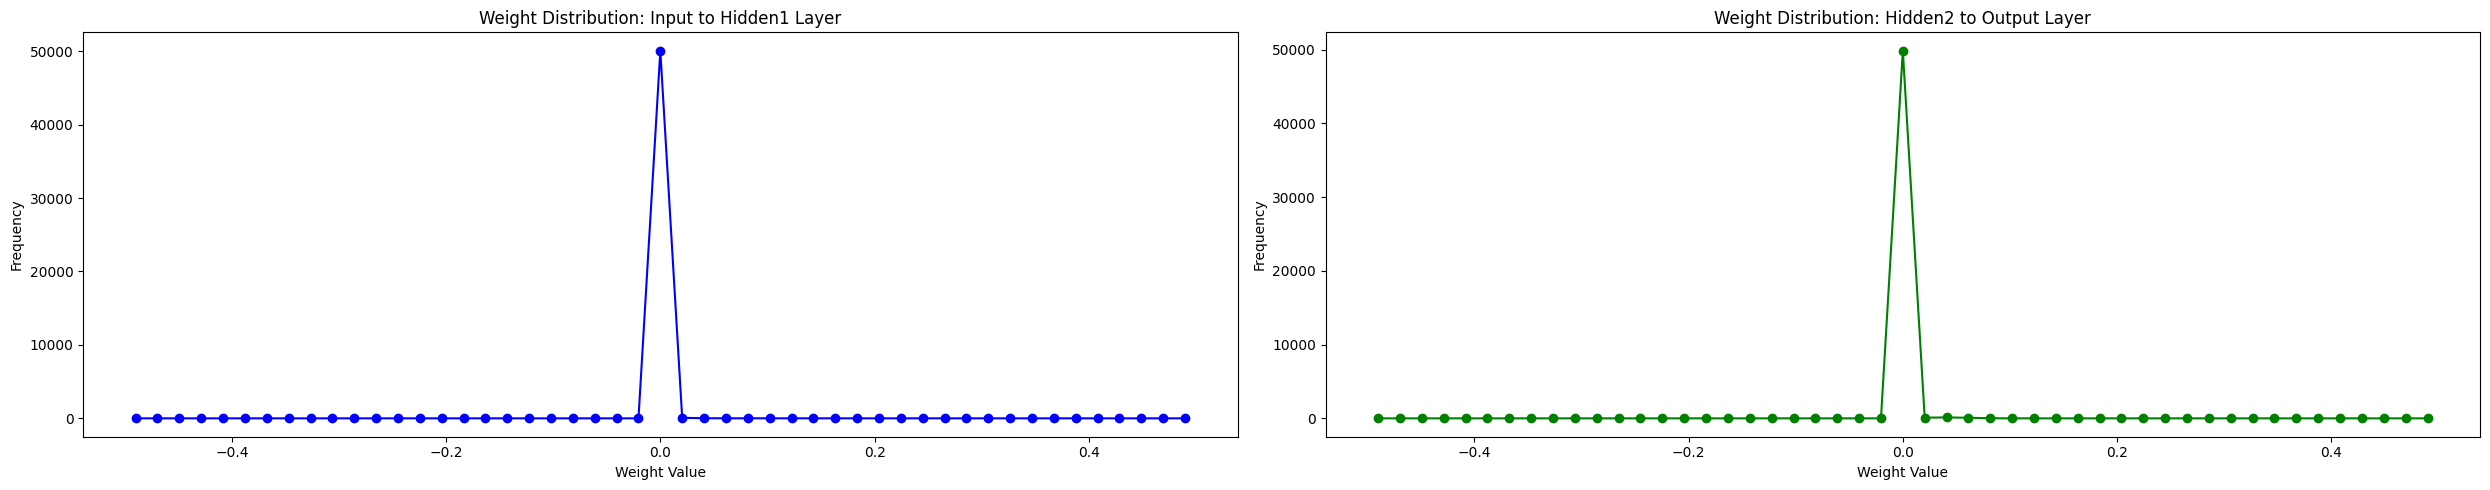

In [4]:
import matplotlib.pyplot as plt

fc_weights = model.fc.weight.cpu().detach().numpy().flatten()
out_weights = model.out.weight.cpu().detach().numpy().flatten()

bins = np.linspace(-0.5, 0.5, 50) 
fc_hist, fc_bins = np.histogram(fc_weights, bins=bins)
out_hist, out_bins = np.histogram(out_weights, bins=bins)

fc_bin_centers = 0.5 * (fc_bins[:-1] + fc_bins[1:])
out_bin_centers = 0.5 * (out_bins[:-1] + out_bins[1:])

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.plot(fc_bin_centers, fc_hist, marker='o', linestyle='-', color='b')
plt.title('Weight Distribution: Input to Hidden1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(out_bin_centers, out_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: Hidden2 to Output Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
import torch

def count_nonzero_weights_above_threshold(layer, threshold=0.1):
    return torch.sum(torch.abs(layer.weight) > threshold).item()

threshold_value = 0.01 

nonzero_fc1 = count_nonzero_weights_above_threshold(model.fc, threshold=threshold_value)
nonzero_fc3 = count_nonzero_weights_above_threshold(model.out, threshold=threshold_value)

print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc1}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 3: {nonzero_fc3}')

Number of non-zero weights greater than 0.01 in layer 1: 118
Number of non-zero weights greater than 0.01 in layer 3: 308
